# HISTOGRAM MATCHING

## LIBRARIES

In [1]:
from skimage.io import imread                        
from skimage.exposure import cumulative_distribution, match_histograms  
import numpy as np                                    
import matplotlib.pyplot as plt  
import cv2

## INPUT AND TEMPLATE IMAGE

In [2]:
img = (imread('images/OOP.MT1. 170215.M103_page_1.jpg', as_gray=True)*255).astype(np.uint8)
print(img.shape)

# Split the image vertically
height = img.shape[0]
split_height = height // 2
imageTemplate = img[:split_height, :]
image = img[split_height:, :]

(2200, 1700)


In [3]:
print(image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


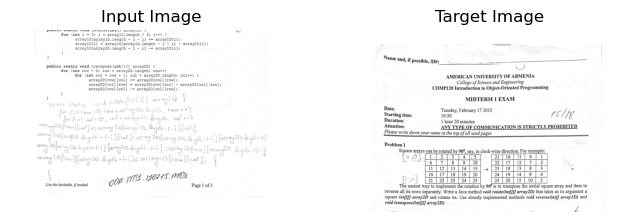

In [4]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Target Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.show()

## CUMULATIVE DISTRIBUTION 

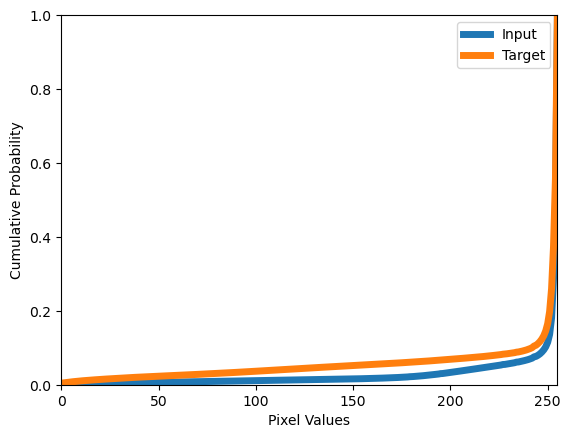

In [5]:
# compute the cumulative distribution of input and target images
cdfImageInput, binsImageInput = cumulative_distribution(image)
cdfImageTemplate, binsImageTemplate = cumulative_distribution(imageTemplate)

# cdfImageInput = np.insert(cdfImageInput, 0, [0]*binsImageInput[0])
# cdfImageInput = np.append(cdfImageInput, [0]*(255-binsImageInput[-1])) 

# cdfImageTemplate = np.insert(cdfImageTemplate, 0, [0]*binsImageTemplate[0])
# cdfImageTemplate = np.append(cdfImageTemplate, [1]*(255-binsImageTemplate[-1]))

plt.plot(cdfImageInput, linewidth=5, label='Input')
plt.plot(cdfImageTemplate, linewidth=5, label='Target')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()


## HISTOGRAM MATCHING

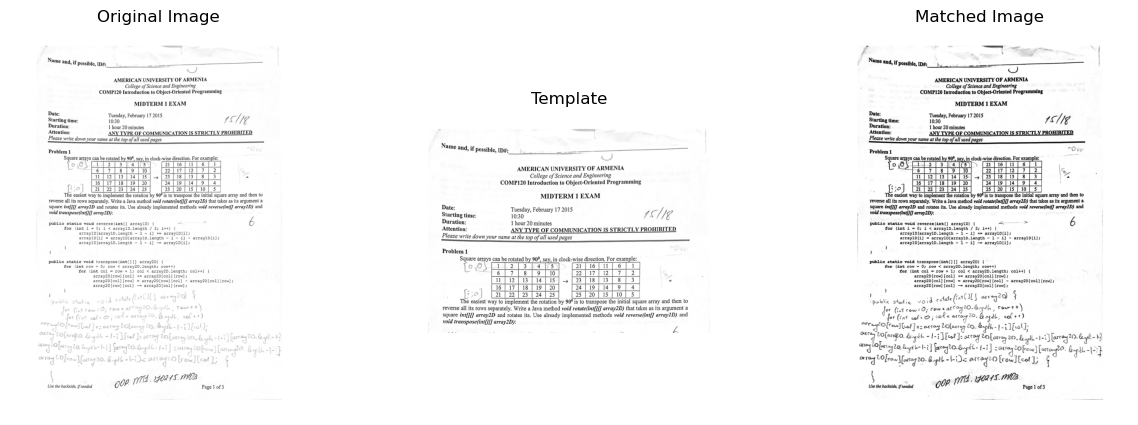

In [6]:
def match_histograms(hA, hR):
    K = len(hA)
    PA = Cdf(hA)
    PR = Cdf(hR)
    fhs = np.zeros(K, dtype=int)
    for a in range(K):
        j = K - 1
        while j >= 0 and PA[a] <= PR[j]:
            fhs[a] = j
            j -= 1
    return fhs, PA, PR


def Cdf(h):
    K = len(h)
    n = 0
    for i in range(K):
        n += h[i]
    P = np.zeros(K, dtype=float)
    c = h[0]
    P[0] = float(c) / n
    for i in range(1, K):
        c += h[i]
        P[i] = float(c) / n
    return P


def apply_mapping(image, fhs):
    matched_image = fhs[image]
    return matched_image

hA, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
hR, _ = np.histogram(imageTemplate.flatten(), bins=256, range=[0,256])

# Compute mapping function
fhs, _, _ = match_histograms(hA, hR)

# Apply mapping function to the image
matched_image = apply_mapping(img, fhs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imageTemplate, cmap='gray') 
plt.title('Template')
plt.axis('off')
out = 255-(img-matched_image)
plt.show()

In [55]:
from PIL import Image 
a = Image.fromarray(np.uint8(filtered_image))
a.save('result.jpg', 'JPEG')

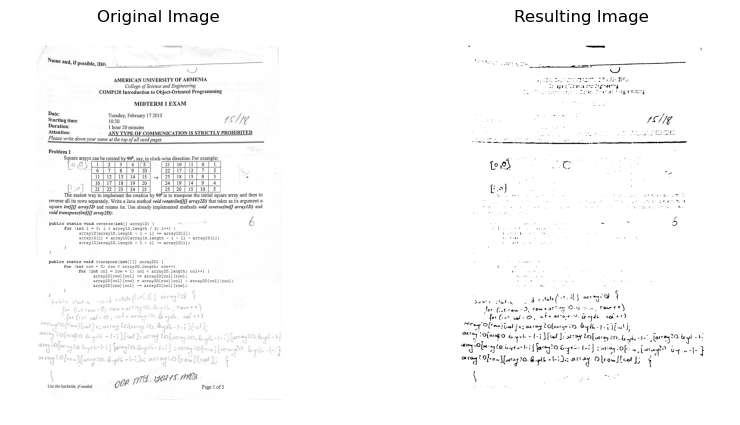

In [54]:
out = out.astype(np.uint8)
 
thresh = 175  
max_val = 255

# Apply binary thresholding
ret, thresh_image = cv2.threshold(out, thresh, max_val, cv2.THRESH_BINARY)
ret, thresh_image = cv2.threshold(thresh_image, 155, max_val, cv2.THRESH_BINARY)

filtered_image = cv2.medianBlur(thresh_image, 5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title('Resulting Image')
plt.axis('off')

plt.show()
